## Cart Pole

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from sb3_contrib import TRPO
from stable_baselines3.common.evaluation import evaluate_policy

In [10]:
env=gym.make('CartPole-v1')

model=TRPO(policy="MlpPolicy",env=env,verbose=1)

rewards=[]

for episode in range(100):
    model.learn(total_timesteps=1000)
    mean_reward,_=evaluate_policy(model,env,n_eval_episodes=5)
    rewards.append(mean_reward)
    print(f"Episode:{episode+1}\tMean Reward:{mean_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | 22.8     |
| time/              |          |
|    fps             | 274      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
Episode:1	Mean Reward:500.0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 26.9     |
| time/              |          |
|    fps             | 257      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
Episode:2	Mean Reward:450.8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 36.2     |
|    ep_rew_mean     | 36.2     |
| time/              |          |

In [11]:
model.save("trpo_cartpole")

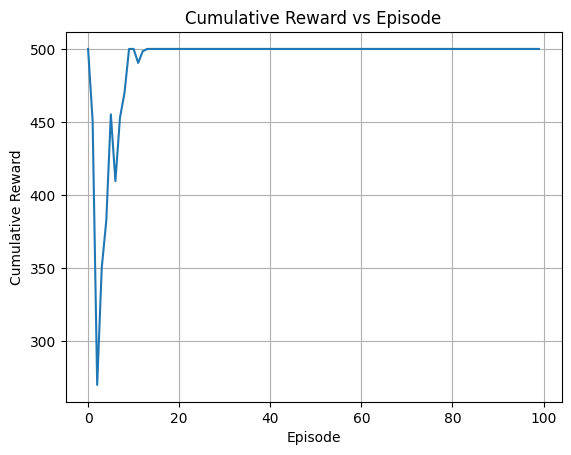

In [12]:
plt.plot(rewards)
plt.title("Cumulative Reward vs Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

In [13]:
model=model.load('ppo_cartpole.zip')

env = gym.make("CartPole-v1",render_mode="human")

obs,info = env.reset()
done = False

obs,info = env.reset()
for _ in range(500):
    action, _ = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    env.render()

    if done:
        obs,info = env.reset()

env.close()

## Lunar Lander

In [14]:
env=gym.make('LunarLander-v3')

model=TRPO(policy="MlpPolicy",env=env,verbose=1)

rewards=[]

for episode in range(100):
    model.learn(total_timesteps=1000)
    mean_reward,_=evaluate_policy(model,env,n_eval_episodes=5)
    rewards.append(mean_reward)
    print(f"Episode:{episode+1}\tMean Reward:{mean_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 87.7     |
|    ep_rew_mean     | -164     |
| time/              |          |
|    fps             | 248      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
Episode:1	Mean Reward:-522.6018374614417
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.3     |
|    ep_rew_mean     | -250     |
| time/              |          |
|    fps             | 251      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
Episode:2	Mean Reward:-303.9308860763907
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 111      |
|    ep_rew_mean     | -139     |
| time/

In [15]:
model.save("trpo_lunarlander")

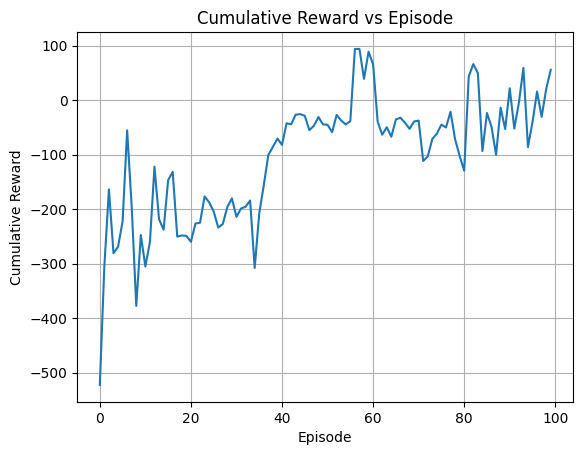

In [16]:
plt.plot(rewards)
plt.title("Cumulative Reward vs Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

In [18]:
model=model.load('trpo_lunarlander.zip')

env = gym.make("LunarLander-v3",render_mode="human")

obs,info = env.reset()
done = False

obs,info = env.reset()
for _ in range(500):
    action, _ = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    env.render()

    if done:
        obs,info = env.reset()

env.close()